### Installing Required Libraries

In [1]:
%pip install numpy pandas matplotlib seaborn ipython jupyterlab Pillow pyscreenshot tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\Alejo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from datetime import datetime
import math
from collections import defaultdict

### Processing NFL Datasets

In [16]:
game_data = pd.read_csv('../../NFLData/games.csv')
pff_scouting_data = pd.read_csv('../../NFLData/pffScoutingData.csv')
player_data = pd.read_csv('../../NFLData/players.csv')
play_data = pd.read_csv('../../NFLData/plays.csv')
tracking_w1_data_original = pd.read_csv('../../NFLData/week1.csv')
tracking_w2_data_original = pd.read_csv('../../NFLData/week2.csv')
tracking_w3_data_original = pd.read_csv('../../NFLData/week3.csv')
tracking_w4_data_original = pd.read_csv('../../NFLData/week4.csv')
tracking_w5_data_original = pd.read_csv('../../NFLData/week5.csv')
tracking_w6_data_original = pd.read_csv('../../NFLData/week6.csv')
tracking_w7_data_original = pd.read_csv('../../NFLData/week7.csv')
tracking_w8_data_original = pd.read_csv('../../NFLData/week8.csv')
tracking_w1_data_original = pd.concat([tracking_w1_data_original,tracking_w2_data_original,tracking_w3_data_original,tracking_w4_data_original,tracking_w5_data_original,tracking_w6_data_original,tracking_w7_data_original,tracking_w8_data_original])

In [17]:
print(tracking_w1_data_original.shape[0])
print(play_data.shape[0])
print(player_data.shape[0])
print(game_data.shape[0])

8314178
8557
1679
122


### 2018 Big Data Bowl Data

In [18]:
game_2018_data = pd.read_csv('../../NFLData/2018games.csv')
player_2018_data = pd.read_csv('../../NFLData/2018players.csv')
play_2018_data = pd.read_csv('../../NFLData/2018plays.csv')
tracking_w1_data_2018 = pd.read_csv('../../NFLData/2018week1.csv')
tracking_w2_data_2018 = pd.read_csv('../../NFLData/2018week2.csv')
tracking_w3_data_2018 = pd.read_csv('../../NFLData/2018week3.csv')
tracking_w4_data_2018 = pd.read_csv('../../NFLData/2018week4.csv')
tracking_w5_data_2018 = pd.read_csv('../../NFLData/2018week5.csv')
tracking_w6_data_2018 = pd.read_csv('../../NFLData/2018week6.csv')
tracking_w7_data_2018 = pd.read_csv('../../NFLData/2018week7.csv')
tracking_w8_data_2018 = pd.read_csv('../../NFLData/2018week8.csv')
tracking_w9_data_2018 = pd.read_csv('../../NFLData/2018week9.csv')
tracking_w10_data_2018 = pd.read_csv('../../NFLData/2018week10.csv')
tracking_w11_data_2018 = pd.read_csv('../../NFLData/2018week11.csv')
tracking_w12_data_2018 = pd.read_csv('../../NFLData/2018week12.csv')
tracking_w13_data_2018 = pd.read_csv('../../NFLData/2018week13.csv')
tracking_w14_data_2018 = pd.read_csv('../../NFLData/2018week14.csv')
tracking_w15_data_2018 = pd.read_csv('../../NFLData/2018week15.csv')
tracking_w16_data_2018 = pd.read_csv('../../NFLData/2018week16.csv')
tracking_w17_data_2018 = pd.read_csv('../../NFLData/2018week17.csv')
tracking_2018_data = pd.concat([tracking_w1_data_2018,tracking_w2_data_2018,tracking_w3_data_2018,tracking_w4_data_2018,
                           tracking_w5_data_2018,tracking_w6_data_2018,tracking_w7_data_2018,tracking_w8_data_2018,
                           tracking_w9_data_2018,tracking_w10_data_2018,tracking_w11_data_2018,tracking_w12_data_2018,
                           tracking_w13_data_2018,tracking_w14_data_2018,tracking_w15_data_2018,tracking_w16_data_2018,
                           tracking_w17_data_2018])

In [19]:
print(tracking_2018_data.shape[0])
print(play_2018_data.shape[0])
print(player_2018_data.shape[0])
print(game_2018_data.shape[0])

18309388
19239
1303
253


### Code To Merge 2018 and 2021 Data

In [20]:
game_data.drop(columns=["season"],inplace=True) # Dropping unneeded column from 2023 dataset
player_2018_data.rename(columns={"position":"officialPosition"},inplace=True)
play_2018_data.rename(columns={"position":"officialPosition"},inplace=True) # renaming columns to allow concat
# Selecting the necessary columns from each play df
play_data = play_data[["gameId","playId","playDescription","quarter","down","yardsToGo","possessionTeam","yardlineSide",
                       "yardlineNumber","gameClock","preSnapHomeScore","preSnapVisitorScore","passResult",
                       "playResult","absoluteYardlineNumber","offenseFormation"]]
play_2018_data = play_2018_data[["gameId","playId","playDescription","quarter","down","yardsToGo","possessionTeam","yardlineSide",
                       "yardlineNumber","gameClock","preSnapHomeScore","preSnapVisitorScore","passResult",
                       "playResult","absoluteYardlineNumber","offenseFormation"]]
tracking_2018_data = tracking_2018_data[["gameId","playId","nflId","frameId","time","jerseyNumber","team","playDirection","x","y","s","a"
                                         ,"dis","o","dir","event"]]


In [21]:
display(game_data.head(5))
display(play_data.head(5))
display(player_data.head(5))
display(tracking_w1_data_original.head(5))

,gameId,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2021090900,1,09/09/2021,20:20:00,TB,DAL
1,2021091200,1,09/12/2021,13:00:00,ATL,PHI
2,2021091201,1,09/12/2021,13:00:00,BUF,PIT
3,2021091202,1,09/12/2021,13:00:00,CAR,NYJ
4,2021091203,1,09/12/2021,13:00:00,CIN,MIN


,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,playResult,absoluteYardlineNumber,offenseFormation
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,TB,33,13:33,0,0,I,0,43.0,SHOTGUN
1,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,DAL,DAL,2,13:18,0,0,C,28,108.0,EMPTY
2,2021090900,187,(12:23) (Shotgun) D.Prescott pass short middle...,1,2,6,DAL,DAL,34,12:23,0,0,C,5,76.0,SHOTGUN
3,2021090900,282,(9:56) D.Prescott pass incomplete deep left to...,1,1,10,DAL,TB,39,09:56,0,0,I,0,49.0,SINGLEBACK
4,2021090900,349,(9:46) (Shotgun) D.Prescott pass incomplete sh...,1,3,15,DAL,TB,44,09:46,0,0,I,0,54.0,SHOTGUN


,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick


,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,None
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,None
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,None
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,None
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,None


In [22]:
display(game_2018_data.head(5))
display(play_2018_data.head(5))
display(player_2018_data.head(5))
display(tracking_w1_data_2018.head(5))

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1


,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,playResult,absoluteYardlineNumber,offenseFormation
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,ATL,20,15:00:00,0.0,0.0,C,10,90.0,I_FORM
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,PHI,39,13:10:00,0.0,0.0,I,0,49.0,SINGLEBACK
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,PHI,39,13:05:00,0.0,0.0,I,0,49.0,SHOTGUN
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,PHI,39,13:01:00,0.0,0.0,C,33,49.0,SHOTGUN
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,PHI,1,10:59:00,0.0,0.0,I,0,11.0,SHOTGUN


,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH


### Concatenate Dataframes

In [23]:
game_data = pd.concat([game_data,game_2018_data])
play_data = pd.concat([play_data,play_2018_data])
tracking_w1_data_original = pd.concat([tracking_w1_data_original,tracking_2018_data])
player_data = pd.concat([player_data,player_2018_data])

In [24]:
teams = game_data[["gameId","homeTeamAbbr","visitorTeamAbbr"]]
display(teams)

,gameId,homeTeamAbbr,visitorTeamAbbr
0,2021090900,TB,DAL
1,2021091200,ATL,PHI
2,2021091201,BUF,PIT
3,2021091202,CAR,NYJ
4,2021091203,CIN,MIN
...,...,...,...
248,2018123013,DEN,LAC
249,2018123015,SEA,ARI
250,2018123014,LA,SF
251,2018122200,TEN,WAS


### Merge Tracking Data With Teams

In [27]:
tracking_w1_data_original = tracking_w1_data_original.merge(game_data,on="gameId",how="left")
display(tracking_w1_data_original)

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,...,a,dis,o,dir,event,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,...,0.30,0.03,165.16,84.99,None,1,09/09/2021,20:20:00,TB,DAL
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,...,0.11,0.02,164.33,92.87,None,1,09/09/2021,20:20:00,TB,DAL
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,...,0.10,0.01,160.24,68.55,None,1,09/09/2021,20:20:00,TB,DAL
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,...,0.24,0.06,152.13,296.85,None,1,09/09/2021,20:20:00,TB,DAL
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,...,0.18,0.04,148.33,287.55,None,1,09/09/2021,20:20:00,TB,DAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26623561,2018123011,4261,2558942.0,102,2018-12-31T04:23:24.200Z,86.0,home,left,95.77,11.20,...,1.75,0.73,103.97,118.54,None,17,12/30/2018,20:20:00,TEN,IND
26623562,2018123011,4261,2558976.0,102,2018-12-31T04:23:24.200Z,23.0,away,left,101.94,14.60,...,2.24,0.57,139.23,119.97,None,17,12/30/2018,20:20:00,TEN,IND
26623563,2018123011,4261,2560789.0,102,2018-12-31T04:23:24.200Z,53.0,away,left,102.68,0.94,...,1.67,0.24,164.79,152.29,None,17,12/30/2018,20:20:00,TEN,IND
26623564,2018123011,4261,2561521.0,102,2018-12-31T04:23:24.200Z,17.0,home,left,105.82,0.71,...,3.53,0.25,284.72,93.44,None,17,12/30/2018,20:20:00,TEN,IND


In [26]:
print(tracking_w1_data_original.shape[0])
print(play_data.shape[0])
print(player_data.shape[0])
print(game_data.shape[0])

26623566
27796
2982
375


### Displaying Nan Values In Pandas Dataframes

In [28]:
nan_values = game_data.isna().sum()
print("-- Game Data Nan Values --")
print(nan_values)

nan_values = pff_scouting_data.isna().sum()
print("-- PFF Scouting Data Nan Values --")
print(nan_values)

nan_values = player_data.isna().sum()
print("-- Player Data Nan Values --")
print(nan_values)

nan_values = play_data.isna().sum()
print("-- Play Data Nan Values --")
print(nan_values)



-- Game Data Nan Values --
gameId             0
week               0
gameDate           0
gameTimeEastern    0
homeTeamAbbr       0
visitorTeamAbbr    0
dtype: int64
-- PFF Scouting Data Nan Values --
gameId                         0
playId                         0
nflId                          0
pff_role                       0
pff_positionLinedUp            0
pff_hit                    94127
pff_hurry                  94127
pff_sack                   94127
pff_beatenByDefender      140167
pff_hitAllowed            140167
pff_hurryAllowed          140167
pff_sackAllowed           140167
pff_nflIdBlockedPlayer    141728
pff_blockType             140350
pff_backFieldBlock        140351
dtype: int64
-- Player Data Nan Values --
nflId                 0
height                0
weight                0
birthDate           232
collegeName         224
officialPosition      0
displayName           0
dtype: int64
-- Play Data Nan Values --
gameId                      0
playId                  

### Displaying Nan Values In Tracking Dataframes

In [29]:
nan_values = tracking_w1_data_original.isna().sum()
print("-- Tracking Week 1 Data Nan Values --")
print(nan_values)

nan_values = tracking_w2_data_original.isna().sum()
print("-- Tracking Week 1 Data Nan Values --")
print(nan_values)

nan_values = tracking_w3_data_original.isna().sum()
print("-- Tracking Week 1 Data Nan Values --")
print(nan_values)

nan_values = tracking_w4_data_original.isna().sum()
print("-- Tracking Week 1 Data Nan Values --")
print(nan_values)

nan_values = tracking_w5_data_original.isna().sum()
print("-- Tracking Week 1 Data Nan Values --")
print(nan_values)

nan_values = tracking_w6_data_original.isna().sum()
print("-- Tracking Week 1 Data Nan Values --")
print(nan_values)

nan_values = tracking_w7_data_original.isna().sum()
print("-- Tracking Week 1 Data Nan Values --")
print(nan_values)

nan_values = tracking_w8_data_original.isna().sum()
print("-- Tracking Week 1 Data Nan Values --")
print(nan_values)

-- Tracking Week 1 Data Nan Values --
gameId                   0
playId                   0
nflId              1609128
frameId                  0
time                     0
jerseyNumber       1609128
team                     0
playDirection            0
x                        0
y                        0
s                        1
a                       28
dis                      1
o                  1609346
dir                1609332
event                    0
week                     0
gameDate                 0
gameTimeEastern          0
homeTeamAbbr             0
visitorTeamAbbr          0
dtype: int64
-- Tracking Week 1 Data Nan Values --
gameId               0
playId               0
nflId            45338
frameId              0
time                 0
jerseyNumber     45338
team                 0
playDirection        0
x                    0
y                    0
s                    0
a                    0
dis                  0
o                45338
dir              45338

### Displaying Game Data Format

In [19]:
print("-- Printing first 5 rows --\n\n")
display(game_data.head(5))
print("\n\n-- Printing Columns --\n\n")
print(game_data.columns)

-- Printing first 5 rows --




,gameId,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2021090900,1,09/09/2021,20:20:00,TB,DAL
1,2021091200,1,09/12/2021,13:00:00,ATL,PHI
2,2021091201,1,09/12/2021,13:00:00,BUF,PIT
3,2021091202,1,09/12/2021,13:00:00,CAR,NYJ
4,2021091203,1,09/12/2021,13:00:00,CIN,MIN




-- Printing Columns --


Index(['gameId', 'week', 'gameDate', 'gameTimeEastern', 'homeTeamAbbr',
       'visitorTeamAbbr'],
      dtype='object')


### Displaying PFF Scouting Data Format

In [20]:
print("-- Printing first 5 rows --\n\n")
display(pff_scouting_data.head(5))
print("\n\n-- Printing Columns --\n\n")
print(pff_scouting_data.columns)

-- Printing first 5 rows --




,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
0,2021090900,97,25511,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021090900,97,35481,Pass Route,TE-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021090900,97,35634,Pass Route,LWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021090900,97,39985,Pass Route,HB-R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021090900,97,40151,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,SW,0.0




-- Printing Columns --


Index(['gameId', 'playId', 'nflId', 'pff_role', 'pff_positionLinedUp',
       'pff_hit', 'pff_hurry', 'pff_sack', 'pff_beatenByDefender',
       'pff_hitAllowed', 'pff_hurryAllowed', 'pff_sackAllowed',
       'pff_nflIdBlockedPlayer', 'pff_blockType', 'pff_backFieldBlock'],
      dtype='object')


### Displaying Player Data Format

In [21]:
print("-- Printing first 5 rows --\n\n")
display(player_data.head(5))
print("\n\n-- Printing Columns --\n\n")
print(player_data.columns)

-- Printing first 5 rows --




,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick




-- Printing Columns --


Index(['nflId', 'height', 'weight', 'birthDate', 'collegeName',
       'officialPosition', 'displayName'],
      dtype='object')


### Displaying Unique Positions

In [22]:
pos = player_data["officialPosition"]
print("----------------------------- Displaying Count For Each Unique Position -----------------------------")
display(pos.value_counts())

----------------------------- Displaying Count For Each Unique Position -----------------------------


WR     438
CB     387
RB     261
TE     249
OLB    236
DE     191
DT     142
ILB    137
FS     137
QB     131
SS     127
T      122
G       99
LB      60
MLB     56
C       55
NT      39
DB      35
FB      34
P       13
LS      12
S       11
HB       5
K        5
Name: officialPosition, dtype: int64

### Displaying Play Data Format

In [23]:
print("-- Printing first 5 rows --\n\n")
display(play_data.head(5))
print("\n\n-- Printing Columns --\n\n")
print(play_data.columns)

-- Printing first 5 rows --




,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,playResult,absoluteYardlineNumber,offenseFormation
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,TB,33,13:33,0.0,0.0,I,0,43.0,SHOTGUN
1,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,DAL,DAL,2,13:18,0.0,0.0,C,28,108.0,EMPTY
2,2021090900,187,(12:23) (Shotgun) D.Prescott pass short middle...,1,2,6,DAL,DAL,34,12:23,0.0,0.0,C,5,76.0,SHOTGUN
3,2021090900,282,(9:56) D.Prescott pass incomplete deep left to...,1,1,10,DAL,TB,39,09:56,0.0,0.0,I,0,49.0,SINGLEBACK
4,2021090900,349,(9:46) (Shotgun) D.Prescott pass incomplete sh...,1,3,15,DAL,TB,44,09:46,0.0,0.0,I,0,54.0,SHOTGUN




-- Printing Columns --


Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'yardlineSide', 'yardlineNumber', 'gameClock',
       'preSnapHomeScore', 'preSnapVisitorScore', 'passResult', 'playResult',
       'absoluteYardlineNumber', 'offenseFormation'],
      dtype='object')


### Displaying Tracking Data Format (Week 1)

Here we identify rows with a particular frameId for a ball_snap event. How do we want to standardize the sequences? Do we drop all but 1 frame before the ball_snap?

In [24]:
print("-- Printing first 10 rows --\n\n")
display(tracking_w1_data_original.head(10))
print("\n\n-- Printing Columns --\n\n")
print(tracking_w1_data_original.columns)
print("\n\n-- Printing Number of Ball Snap Events -- \n\n")
print(tracking_w1_data_original.loc[(tracking_w1_data_original["event"] == "ball_snap") & (tracking_w1_data_original["frameId"] > 20)].shape[0])

-- Printing first 10 rows --




,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,None
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,None
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,None
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,None
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,None
5,2021090900,97,25511.0,6,2021-09-10T00:26:31.600,12.0,TB,right,37.64,24.26,0.35,0.53,0.05,144.42,282.72,ball_snap
6,2021090900,97,25511.0,7,2021-09-10T00:26:31.700,12.0,TB,right,37.56,24.26,0.54,1.05,0.08,137.49,272.95,None
7,2021090900,97,25511.0,8,2021-09-10T00:26:31.800,12.0,TB,right,37.47,24.25,0.80,1.85,0.09,131.95,267.49,None
8,2021090900,97,25511.0,9,2021-09-10T00:26:31.900,12.0,TB,right,37.38,24.24,0.99,2.03,0.09,129.85,263.48,None
9,2021090900,97,25511.0,10,2021-09-10T00:26:32.000,12.0,TB,right,37.27,24.23,1.19,1.82,0.11,123.79,263.77,None




-- Printing Columns --


Index(['gameId', 'playId', 'nflId', 'frameId', 'time', 'jerseyNumber', 'team',
       'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event'],
      dtype='object')


-- Printing Number of Ball Snap Events -- 


743


### Data Cleaning

Here we print the Nan values found in the Pandas Dataframe from the Week 1 tracking dataset. We can see that there are ~48 thousand rows with required data missing, and therefore we clean our data from dropping these values from our dataframe.

In [30]:
## See Empty Values and Clean Data
## Creating a copy and keeping the original
tracking_w1_data = tracking_w1_data_original.copy()

ball_mask = tracking_w1_data['nflId'].isnull()
ball_rows = tracking_w1_data[ball_mask]
mask = ball_rows['event'] == 'ball_snap'
ball_first_frame = ball_rows[mask]
#print(ball_first_frame.shape[0])
print(ball_first_frame['playId'].nunique())
nan_values = tracking_w1_data.isna().sum()
print(nan_values)
print("\n\nPrinting out Nan values below...\n\n")
display(tracking_w1_data[tracking_w1_data.isna().any(axis=1)])

tracking_w1_data= tracking_w1_data.dropna()



4713
gameId                   0
playId                   0
nflId              1609128
frameId                  0
time                     0
jerseyNumber       1609128
team                     0
playDirection            0
x                        0
y                        0
s                        1
a                       28
dis                      1
o                  1609346
dir                1609332
event                    0
week                     0
gameDate                 0
gameTimeEastern          0
homeTeamAbbr             0
visitorTeamAbbr          0
dtype: int64


Printing out Nan values below...




,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,...,a,dis,o,dir,event,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
946,2021090900,97,NaN,1,2021-09-10T00:26:31.100,NaN,football,right,42.92,24.04,...,0.00,0.00,NaN,NaN,None,1,09/09/2021,20:20:00,TB,DAL
947,2021090900,97,NaN,2,2021-09-10T00:26:31.200,NaN,football,right,42.23,23.91,...,0.12,0.70,NaN,NaN,None,1,09/09/2021,20:20:00,TB,DAL
948,2021090900,97,NaN,3,2021-09-10T00:26:31.300,NaN,football,right,42.17,23.89,...,0.73,0.07,NaN,NaN,None,1,09/09/2021,20:20:00,TB,DAL
949,2021090900,97,NaN,4,2021-09-10T00:26:31.400,NaN,football,right,42.10,23.89,...,1.86,0.07,NaN,NaN,None,1,09/09/2021,20:20:00,TB,DAL
950,2021090900,97,NaN,5,2021-09-10T00:26:31.500,NaN,football,right,41.82,23.91,...,6.28,0.28,NaN,NaN,None,1,09/09/2021,20:20:00,TB,DAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26623509,2018123011,4261,NaN,98,2018-12-31T04:23:23.799Z,NaN,football,left,101.52,1.27,...,4.07,0.10,NaN,NaN,None,17,12/30/2018,20:20:00,TEN,IND
26623523,2018123011,4261,NaN,99,2018-12-31T04:23:23.900Z,NaN,football,left,101.49,1.17,...,3.25,0.11,NaN,NaN,None,17,12/30/2018,20:20:00,TEN,IND
26623537,2018123011,4261,NaN,100,2018-12-31T04:23:24.000Z,NaN,football,left,101.44,1.08,...,1.96,0.10,NaN,NaN,None,17,12/30/2018,20:20:00,TEN,IND
26623551,2018123011,4261,NaN,101,2018-12-31T04:23:24.099Z,NaN,football,left,101.39,0.99,...,1.22,0.10,NaN,NaN,out_of_bounds,17,12/30/2018,20:20:00,TEN,IND


### Displaying Nan Values After Removal

Here we provide evidence of no Nan values remaining in our dataset.

In [26]:
### Seeing remaining nan values

nan_values = tracking_w1_data.isna().sum()
print(nan_values)
print("\n\nPrinting out Nan values below...\n\n")
print(tracking_w1_data[tracking_w1_data.isna().any(axis=1)])

gameId           0
playId           0
nflId            0
frameId          0
time             0
jerseyNumber     0
team             0
playDirection    0
x                0
y                0
s                0
a                0
dis              0
o                0
dir              0
event            0
dtype: int64


Printing out Nan values below...


Empty DataFrame
Columns: [gameId, playId, nflId, frameId, time, jerseyNumber, team, playDirection, x, y, s, a, dis, o, dir, event]
Index: []


In [27]:
db_pos = player_data.loc[(player_data["officialPosition"] == "DB")]
db_pos

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
1438,52912,6-0,210,1998-07-07,Notre Dame,DB,Jalen Elliott
1582,53566,5-10,186,NaN,NaN,DB,Tre Brown
79,2508004,71,207,1987-03-27,Tennessee State,DB,Anthony Levine
362,2561008,75,214,1997-04-18,Alabama,DB,Ronnie Harrison
406,2560886,72,181,1996-03-08,Virginia Tech,DB,Greg Stroman
603,2560775,73,200,1995-01-23,Tennessee,DB,Rashaan Gaulden
636,2560818,72,205,1994-08-04,Jacksonville State,DB,Siran Neal
681,2560921,71,205,1996-03-19,Texas A&M,DB,Armani Watts
699,2560930,70,198,1997-03-18,Pittsburgh,DB,Jordan Whitehead
711,2560759,71,200,1995-12-15,Wisconsin,DB,Natrell Jamerson


### Displaying Tracking Data and Player Data For Merge (Left Join)

In [28]:
print("--------------------------- Player Tracking Data ---------------------------")
display(tracking_w1_data.head(5))
print("-------------------------------- Player Data --------------------------------")
display(player_data.head(5))

--------------------------- Player Tracking Data ---------------------------


,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,None
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,None
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,None
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,None
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,None


-------------------------------- Player Data --------------------------------


,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick


### Left Join Player and Player Tracking Data

We will left join into the Player Tracking Dataset on the nflId column.

In [32]:
player_positions = player_data[["nflId","officialPosition"]]
player_positions_isolated = player_positions.loc[(player_positions["officialPosition"] == "TE")|(player_positions["officialPosition"] == "WR")|(player_positions["officialPosition"] == "SS")|(player_positions["officialPosition"] == "FS")|(player_positions["officialPosition"] == "CB")|(player_positions["officialPosition"] == "DB")] 
player_tracking = tracking_w1_data.merge(player_positions_isolated,on="nflId",how="left")
player_tracking_all = tracking_w1_data.merge(player_positions,on="nflId",how="inner")
player_tracking_isolated = tracking_w1_data.merge(player_positions_isolated,on="nflId",how="inner")
#print(player_tracking_isolated.loc[(player_tracking_isolated["nflId"]=="NA")])
print("----------------------------------- Results of Left Join With All Positions ----------------------------------")
display(player_tracking)
print("-------------------------------- Results of Inner Join With Isolated Positions --------------------------------")
display(player_tracking_isolated)

----------------------------------- Results of Left Join With All Positions ----------------------------------


,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,...,dis,o,dir,event,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,officialPosition
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,...,0.03,165.16,84.99,None,1,09/09/2021,20:20:00,TB,DAL,NaN
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,...,0.02,164.33,92.87,None,1,09/09/2021,20:20:00,TB,DAL,NaN
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,...,0.01,160.24,68.55,None,1,09/09/2021,20:20:00,TB,DAL,NaN
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,...,0.06,152.13,296.85,None,1,09/09/2021,20:20:00,TB,DAL,NaN
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,...,0.04,148.33,287.55,None,1,09/09/2021,20:20:00,TB,DAL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25014215,2018123011,4261,2558060.0,102,2018-12-31T04:23:24.200Z,29.0,away,left,72.95,23.20,...,0.40,110.13,105.63,None,17,12/30/2018,20:20:00,TEN,IND,FS
25014216,2018123011,4261,2558942.0,102,2018-12-31T04:23:24.200Z,86.0,home,left,95.77,11.20,...,0.73,103.97,118.54,None,17,12/30/2018,20:20:00,TEN,IND,TE
25014217,2018123011,4261,2558976.0,102,2018-12-31T04:23:24.200Z,23.0,away,left,101.94,14.60,...,0.57,139.23,119.97,None,17,12/30/2018,20:20:00,TEN,IND,CB
25014218,2018123011,4261,2560789.0,102,2018-12-31T04:23:24.200Z,53.0,away,left,102.68,0.94,...,0.24,164.79,152.29,None,17,12/30/2018,20:20:00,TEN,IND,NaN


-------------------------------- Results of Inner Join With Isolated Positions --------------------------------


,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,...,dis,o,dir,event,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,officialPosition
0,2021090900,97,35481.0,1,2021-09-10T00:26:31.100,87.0,TB,right,41.08,29.15,...,0.03,35.96,238.77,None,1,09/09/2021,20:20:00,TB,DAL,TE
1,2021090900,97,35481.0,2,2021-09-10T00:26:31.200,87.0,TB,right,41.34,29.45,...,0.40,102.09,29.56,None,1,09/09/2021,20:20:00,TB,DAL,TE
2,2021090900,97,35481.0,3,2021-09-10T00:26:31.300,87.0,TB,right,41.53,29.39,...,0.20,68.16,71.57,None,1,09/09/2021,20:20:00,TB,DAL,TE
3,2021090900,97,35481.0,4,2021-09-10T00:26:31.400,87.0,TB,right,41.53,29.38,...,0.01,73.06,82.44,None,1,09/09/2021,20:20:00,TB,DAL,TE
4,2021090900,97,35481.0,5,2021-09-10T00:26:31.500,87.0,TB,right,41.54,29.36,...,0.03,76.60,75.14,None,1,09/09/2021,20:20:00,TB,DAL,TE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14245363,2018123014,4206,2561469.0,94,2018-12-31T00:31:03.799Z,31.0,home,right,106.97,39.50,...,0.88,55.62,68.12,None,17,12/30/2018,16:25:00,LA,SF,CB
14245364,2018123014,4206,2561469.0,95,2018-12-31T00:31:03.900Z,31.0,home,right,107.79,39.81,...,0.88,57.99,69.24,None,17,12/30/2018,16:25:00,LA,SF,CB
14245365,2018123014,4206,2561469.0,96,2018-12-31T00:31:04.000Z,31.0,home,right,108.61,40.12,...,0.87,61.10,69.85,None,17,12/30/2018,16:25:00,LA,SF,CB
14245366,2018123014,4206,2561469.0,97,2018-12-31T00:31:04.099Z,31.0,home,right,109.42,40.41,...,0.86,58.86,70.47,touchdown,17,12/30/2018,16:25:00,LA,SF,CB


### Displaying Unique Position Count After Data Cleaning

In [30]:
pos = player_tracking_isolated["officialPosition"]
print("----------------------------- Displaying Count For Each Unique Position -----------------------------")
display(pos.value_counts())

----------------------------- Displaying Count For Each Unique Position -----------------------------


CB    4456058
WR    4380691
TE    1919719
FS    1774856
SS    1517477
DB     196567
Name: officialPosition, dtype: int64

### Encoding Categorical Data

In our tracking dataset we identify 3 categorical columns (team,playDirection,event) with string values. For each of these columns, we will create an encoded dictionary that holds the corresponding numerical values for each unique category found in each of those columns.

In [33]:
# Encoding categorical data
categorical_data = ["team","playDirection","event","officialPosition"]
category_codes = {}

w1_data_copy = player_tracking_isolated.copy()

for i in player_tracking_isolated:
    if i in categorical_data:
        specific_codes = {}
        player_tracking_isolated[i] = player_tracking_isolated[i].astype("category")
        player_tracking_isolated[i] = player_tracking_isolated[i].cat.codes
        coded = player_tracking_isolated[i].unique()#
        count = 0
        for j in w1_data_copy[i].unique():
           specific_codes[j] = coded[count]
           count += 1
        category_codes[i] = specific_codes

for i in category_codes:
  print("{} -".format(i))
  for j in category_codes[i]:
    print("{}: {}".format(j, category_codes[i][j]))


team -
TB: 29
DAL: 8
PHI: 25
ATL: 1
ARI: 0
PIT: 26
BUF: 3
NYJ: 24
CAR: 4
JAX: 14
MIN: 20
CIN: 6
SF: 28
DET: 10
HOU: 12
IND: 13
SEA: 27
TEN: 30
LAC: 17
WAS: 31
KC: 15
CLE: 7
MIA: 19
NE: 21
CHI: 5
NO: 22
GB: 11
LV: 18
DEN: 9
NYG: 23
LA: 16
BAL: 2
home: 33
away: 32
playDirection -
right: 1
left: 0
event -
None: 0
ball_snap: 4
autoevent_passforward: 2
pass_forward: 21
pass_arrived: 20
play_action: 31
autoevent_passinterrupted: 3
autoevent_ballsnap: 1
man_in_motion: 18
shift: 39
pass_outcome_incomplete: 24
pass_outcome_caught: 23
run: 36
qb_sack: 33
qb_strip_sack: 35
pass_tipped: 28
line_set: 17
fumble_offense_recovered: 12
tackle: 41
fumble: 10
first_contact: 9
handoff: 13
out_of_bounds: 19
dropped_pass: 5
penalty_flag: 30
huddle_break_offense: 14
lateral: 16
pass_outcome_interception: 25
pass_shovel: 27
touchdown: 44
pass_outcome_touchdown: 26
fumble_defense_recovered: 11
pass_lateral: 22
qb_spike: 34
timeout_home: 42
punt_fake: 32
huddle_start_offense: 15
touchback: 43
run_pass_option: 3

### Viewing Auto Event Ball Snap In Comparison with Ball Snap Events

In [34]:
ball_snap_events =  player_tracking_isolated.loc[(player_tracking_isolated["event"] == 4)][["gameId","playId","nflId","event","frameId"]]
auto_event_ball_snap_events =  player_tracking_isolated.loc[(player_tracking_isolated["event"] == 1)][["gameId","playId","nflId","event","frameId"]]
intersect_events = pd.merge(ball_snap_events,auto_event_ball_snap_events,how="inner",on=["gameId","playId","nflId"])
display(ball_snap_events)
display(auto_event_ball_snap_events)
print("------------------------------- Displaying Intersection of Events For a Given Game, Play and Player -------------------------------")
display(intersect_events)

,gameId,playId,nflId,event,frameId
5,2021090900,97,35481.0,4,6
48,2021090900,410,35481.0,4,6
75,2021090900,434,35481.0,4,6
103,2021090900,456,35481.0,4,6
139,2021090900,480,35481.0,4,6
...,...,...,...,...,...
14245047,2018123012,2522,2561394.0,4,11
14245100,2018123012,2548,2561394.0,4,11
14245145,2018123012,2739,2561394.0,4,11
14245204,2018123014,4181,2561469.0,4,11


,gameId,playId,nflId,event,frameId
447,2021090900,1227,35481.0,1,6
688,2021090900,2871,35481.0,1,6
835,2021090900,3110,35481.0,1,6
890,2021090900,3110,35481.0,1,61
923,2021090900,3134,35481.0,1,6
...,...,...,...,...,...
3244830,2021103108,1632,53526.0,1,7
3244891,2021103108,2292,43397.0,1,7
3245057,2021103108,2711,43397.0,1,7
3245126,2021103108,3279,43397.0,1,7


------------------------------- Displaying Intersection of Events For a Given Game, Play and Player -------------------------------


,gameId,playId,nflId,event_x,frameId_x,event_y,frameId_y
0,2021090900,1227,35481.0,4,7,1,6
1,2021090900,2871,35481.0,4,7,1,6
2,2021090900,3110,35481.0,4,62,1,6
3,2021090900,3110,35481.0,4,62,1,61
4,2021090900,3134,35481.0,4,7,1,6
...,...,...,...,...,...,...,...
33762,2021103108,1632,53526.0,4,6,1,7
33763,2021103108,2292,43397.0,4,6,1,7
33764,2021103108,2711,43397.0,4,6,1,7
33765,2021103108,3279,43397.0,4,6,1,7


### Defining Sequence Terminal Events

In [35]:
event_dict = category_codes['event']
terminal_events = ['qb_sack','pass_outcome_incomplete','qb_strip_sack','pass_outcome_caught','pass_tipped','fumble','fumble_offense_recovered','lateral','run','pass_arrived']
terminal_events = [event_dict[x] for x in terminal_events] # QB Sack, Pass Outcome Incomplete, QB Strip Sack, Pass Outcome Caught, Pass Tipped, Fumble, Fumple Recovered, Lateral, Run, Pass Arrived

### Creating Functions For Sequence Generation

Here we define functions that will take in a dataframe of tracking data and generate sequences. The first function will generate sequences for a single play and game, returning a dictionary with keys corresponding to each player in that play. This will be used by dataframes with no positional filters to graph entire plays.


In [36]:
def generate_sequences_single_play(df):    
    id_columns = df[["officialPosition","nflId"]]
    sequence_dict_keys = id_columns.drop_duplicates()
    sequence_dict_keys_arr = list(sequence_dict_keys.itertuples(index=False,name=None))
    sequence_dict = dict.fromkeys(sequence_dict_keys_arr,[])
    current_seq = []
    nflID = -1
    position = -1
    collect = False
    terminal = False
    count = 0
    for row in df.itertuples():
        if not(collect):
            collect = (row.event == 4)
        if not(terminal):
            terminal= (row.event in terminal_events)    # Play terminal or changes from coached D to responsive D
        if (nflID == -1) or (nflID != row.nflId):
            if len(current_seq) > 0:
                sequence_dict[(position,nflID)] = current_seq
                current_seq = []
                count +=1
            terminal = (row.event in terminal_events)
            collect = (row.event == 4)
            nflID = row.nflId
            position = row.officialPosition
            if collect and len(current_seq) < 90 and not(terminal):
                current_seq.append([row.frameId,row.team,row.x,row.y,row.s,row.o,row.event]) #removed row.time, frames are 1/10 of a second
        elif nflID == row.nflId and collect and not(terminal):
            current_seq.append([row.frameId,row.team,row.x,row.y,row.s,row.o,row.event])
    print(f"Sequences generated: {count}")
    return (sequence_dict)

This second function will generate a nested dictionary. The outer dictionary will have a composite key identifying each play from a game. The inner key will correspond to the player of a given play. This nested dictionary will be used to isolate plays and generate sequences for all of the tracking data, while having them divided by play and player. The function will also determine what events were captured in the dataframe. Finally, the function also returns a 3D array of sequences, containing every sequence of the inner dictionaries.

In [37]:
def generate_sequences(df):
    sequence_dict = defaultdict(dict)
    sequence_dict_dense = defaultdict(dict)

    captured_events = []
    seq_arr = []
    current_seq = []
    current_seq_dense = []

    gameID = -1
    playID = -1
    nflID = -1
    position = -1
    collect = False
    terminal = False
    count = 0
    for row in df.itertuples():
        if not(collect):
            collect = (row.event == 4)
        if not(terminal):
            terminal= (row.event in terminal_events)    # Play terminal or changes from coached D to responsive D
        if (gameID == -1 or playID == -1 or nflID == -1) or (gameID != row.gameId or playID != row.playId or nflID != row.nflId):
            if len(current_seq) > 10:
                sequence_dict[(gameID,playID)][(position,nflID)] = current_seq
                sequence_dict_dense[(gameID,playID)][(position,nflID)] = current_seq_dense

                seq_arr.append(current_seq_dense)

                current_seq = []
                current_seq_dense = []

                count +=1
                
            terminal = (row.event in terminal_events)
            collect = (row.event == 4)
            gameID = row.gameId
            playID = row.playId
            nflID = row.nflId
            position = row.officialPosition
            if collect and len(current_seq) < 90 and not(terminal):
                current_seq.append([row.frameId,row.team,row.x,row.y,row.s,row.o,row.event]) #removed row.time, frames are 1/10 of a second
                current_seq_dense.append([row.x,row.y,row.s,row.a,row.dis,row.o]) 

                if not(row.event in captured_events) and row.event != 0:
                    captured_events.append(row.event)

        elif gameID == row.gameId and playID == row.playId and nflID == row.nflId and collect and not(terminal):
            current_seq.append([row.frameId,row.team,row.x,row.y,row.s,row.o,row.event])
            current_seq_dense.append([row.x,row.y,row.s,row.a,row.dis,row.o]) 

            if not(row.event in captured_events) and row.event != 0:
                captured_events.append(row.event)
    print(f"Sequences generated: {count}")
    return (seq_arr,captured_events,sequence_dict,sequence_dict_dense)

In [36]:
'''skip = False
            flip_y = row.y>los_y
            mask = (ball_first_frame['gameId'] == row.gameId) & (ball_first_frame['playId'] == row.playId)
            ball_row = ball_first_frame[mask]
            if ball_row.empty:
                skip = True
            else:
                los_x = ball_row.iloc[0]['x']
            '''
'''if row.playDirection == 0:
                    x = row.x - los_x
                    x = -x
                    x = x + los_x
                else:
                    x = row.x
                if flip_y:
                    y = row.y-los_y
                    y = -y
                    y = y+los_y
                else:
                    y = row.y'''

'if row.playDirection == 0:\n                    x = row.x - los_x\n                    x = -x\n                    x = x + los_x\n                else:\n                    x = row.x\n                if flip_y:\n                    y = row.y-los_y\n                    y = -y\n                    y = y+los_y\n                else:\n                    y = row.y'

### Creating Sequences for the Week 1 Tracking Dataset

Here we generate sequences for plays and players using our week 1 player tracking dataset. Below we display an entry to our sequences array which corresponds to a sequence for a given play and player. We can see that this is a sequence of arrays of size 12 with numbers from our tracking dataset and encoded categorical columns. This particular sequence is 43 frames long (note that we have dropped id columns and datetime).

In [38]:
sequences,captured_events,seq_dict,seq_dict_dense = generate_sequences(player_tracking_isolated)
print("Printing Example Sequence")
print(sequences[0])
print(f"\n\nNumber of entries in this sequence: {len(sequences[0])}")
#player_tracking_isolated_copy = player_tracking_isolated.copy()
#player_tracking_normalized = normalize_data(player_tracking_isolated_copy)
#sequences_standardized,_,seq_dict_standardized = generate_sequences(player_tracking_standardized)
#sequences_final,_,seq_dict_final = generate_sequences(player_tracking_normalized)
#sequences,captured_events,seq_dict,seq_dict_dense = generate_sequences(player_tracking_isolated)

#print("Printing Example Standardized Sequence")
#print(sequences[0])
#print(f"\n\nNumber of entries in this sequence: {len(sequences[0])}")
#sequences = seq_standardization(seq_arr=sequences)
#print(seq_dict[(2021090900, 97)][(3, 35481.0)])

Sequences generated: 245130
Printing Example Sequence
[[41.65, 29.34, 1.2, 1.78, 0.1, 78.97], [41.75, 29.36, 1.56, 2.19, 0.11, 82.37], [41.87, 29.42, 2.03, 2.65, 0.13, 73.75], [42.04, 29.55, 2.27, 2.27, 0.22, 75.34], [42.21, 29.71, 2.48, 1.94, 0.23, 78.47], [42.39, 29.89, 2.82, 2.09, 0.26, 72.68], [42.57, 30.13, 3.07, 1.96, 0.29, 66.34], [42.74, 30.4, 3.27, 1.96, 0.32, 56.5], [42.9, 30.69, 3.5, 2.2, 0.34, 45.23], [43.04, 31.01, 3.53, 2.06, 0.35, 24.29], [43.16, 31.35, 3.6, 1.79, 0.36, 19.14], [43.29, 31.71, 3.87, 1.29, 0.39, 8.45], [43.42, 32.1, 4.11, 1.19, 0.41, 6.52], [43.54, 32.51, 4.24, 0.94, 0.42, 7.65], [43.64, 32.95, 4.47, 1.14, 0.45, 14.52], [43.74, 33.41, 4.67, 1.08, 0.47, 13.3], [43.84, 33.89, 4.87, 1.34, 0.49, 6.26], [43.96, 34.39, 5.16, 1.41, 0.52, 9.51], [44.07, 34.91, 5.38, 1.13, 0.54, 13.58], [44.2, 35.47, 5.64, 1.02, 0.57, 8.41], [44.35, 36.06, 5.96, 1.22, 0.61, 2.99], [44.5, 36.65, 6.07, 0.77, 0.6, 359.99], [44.63, 37.25, 6.2, 0.72, 0.62, 14.51], [44.77, 37.87, 6.34, 0

In [39]:
last_five = list(seq_dict_dense.items())[-5:]

# Print the last 5 key-value pairs
for key, value in last_five:
    print(key, value)

(2018120910, 1750) {(5, 2560836.0): [[29.49, 18.86, 0.0, 0.05, 0.01, 87.07], [29.5, 18.85, 0.05, 0.77, 0.01, 89.86], [29.52, 18.84, 0.21, 1.51, 0.02, 89.86], [29.56, 18.83, 0.53, 2.42, 0.05, 89.86], [29.67, 18.8, 1.1, 4.06, 0.11, 89.86], [29.81, 18.76, 1.6, 4.44, 0.14, 89.86], [30.0, 18.72, 2.13, 4.29, 0.2, 89.86], [30.25, 18.66, 2.65, 4.04, 0.25, 88.82], [30.54, 18.6, 3.11, 3.7, 0.3, 91.42], [30.87, 18.52, 3.51, 3.26, 0.34, 94.77], [31.24, 18.42, 3.9, 2.9, 0.38, 99.36], [31.63, 18.31, 4.2, 2.52, 0.41, 102.69], [32.04, 18.17, 4.45, 2.33, 0.43, 102.69], [32.48, 18.0, 4.8, 2.73, 0.47, 108.56], [32.94, 17.8, 5.1, 2.57, 0.5, 109.26], [33.42, 17.57, 5.37, 2.3, 0.53, 111.53], [33.9, 17.31, 5.53, 1.96, 0.55, 114.52], [34.39, 17.02, 5.79, 1.83, 0.58, 114.52], [34.91, 16.7, 6.03, 1.71, 0.6, 115.65], [35.45, 16.36, 6.36, 1.62, 0.64, 109.26], [36.01, 15.99, 6.69, 1.54, 0.67, 109.26], [36.58, 15.61, 6.95, 1.28, 0.69, 107.16], [37.18, 15.21, 7.16, 1.16, 0.71, 103.11], [37.81, 14.82, 7.45, 1.17, 0.7

### Printing Captured Events

In [38]:
event_dic = category_codes["event"]
event_dic_keyarr = list(event_dic.keys())
event_dic_valuearr = list(event_dic.values())
for event in captured_events:
    print(event_dic_keyarr[event_dic_valuearr.index(event)])

ball_snap
autoevent_passforward
pass_forward
play_action
autoevent_passinterrupted
autoevent_ballsnap
man_in_motion
shift
first_contact
handoff
line_set
dropped_pass
penalty_flag
huddle_break_offense
pass_shovel
qb_spike
punt_fake
pass_outcome_interception
tackle
touchback
out_of_bounds
run_pass_option
pass_outcome_touchdown
snap_direct
pass_lateral
field_goal_fake
touchdown
huddle_start_offense
penalty_accepted
safety
field_goal_blocked


### Displaying Distribution Of Play Length After Ball Snap

,gameId,playId,nflId,counts
0,2018090600,75,79848.0,59
1,2018090600,75,2495454.0,59
2,2018090600,75,2495613.0,59
3,2018090600,75,2533040.0,59
4,2018090600,75,2534832.0,59
...,...,...,...,...
246602,2021110100,4433,47954.0,58
246603,2021110100,4433,47984.0,58
246604,2021110100,4433,52546.0,58
246605,2021110100,4433,52573.0,58


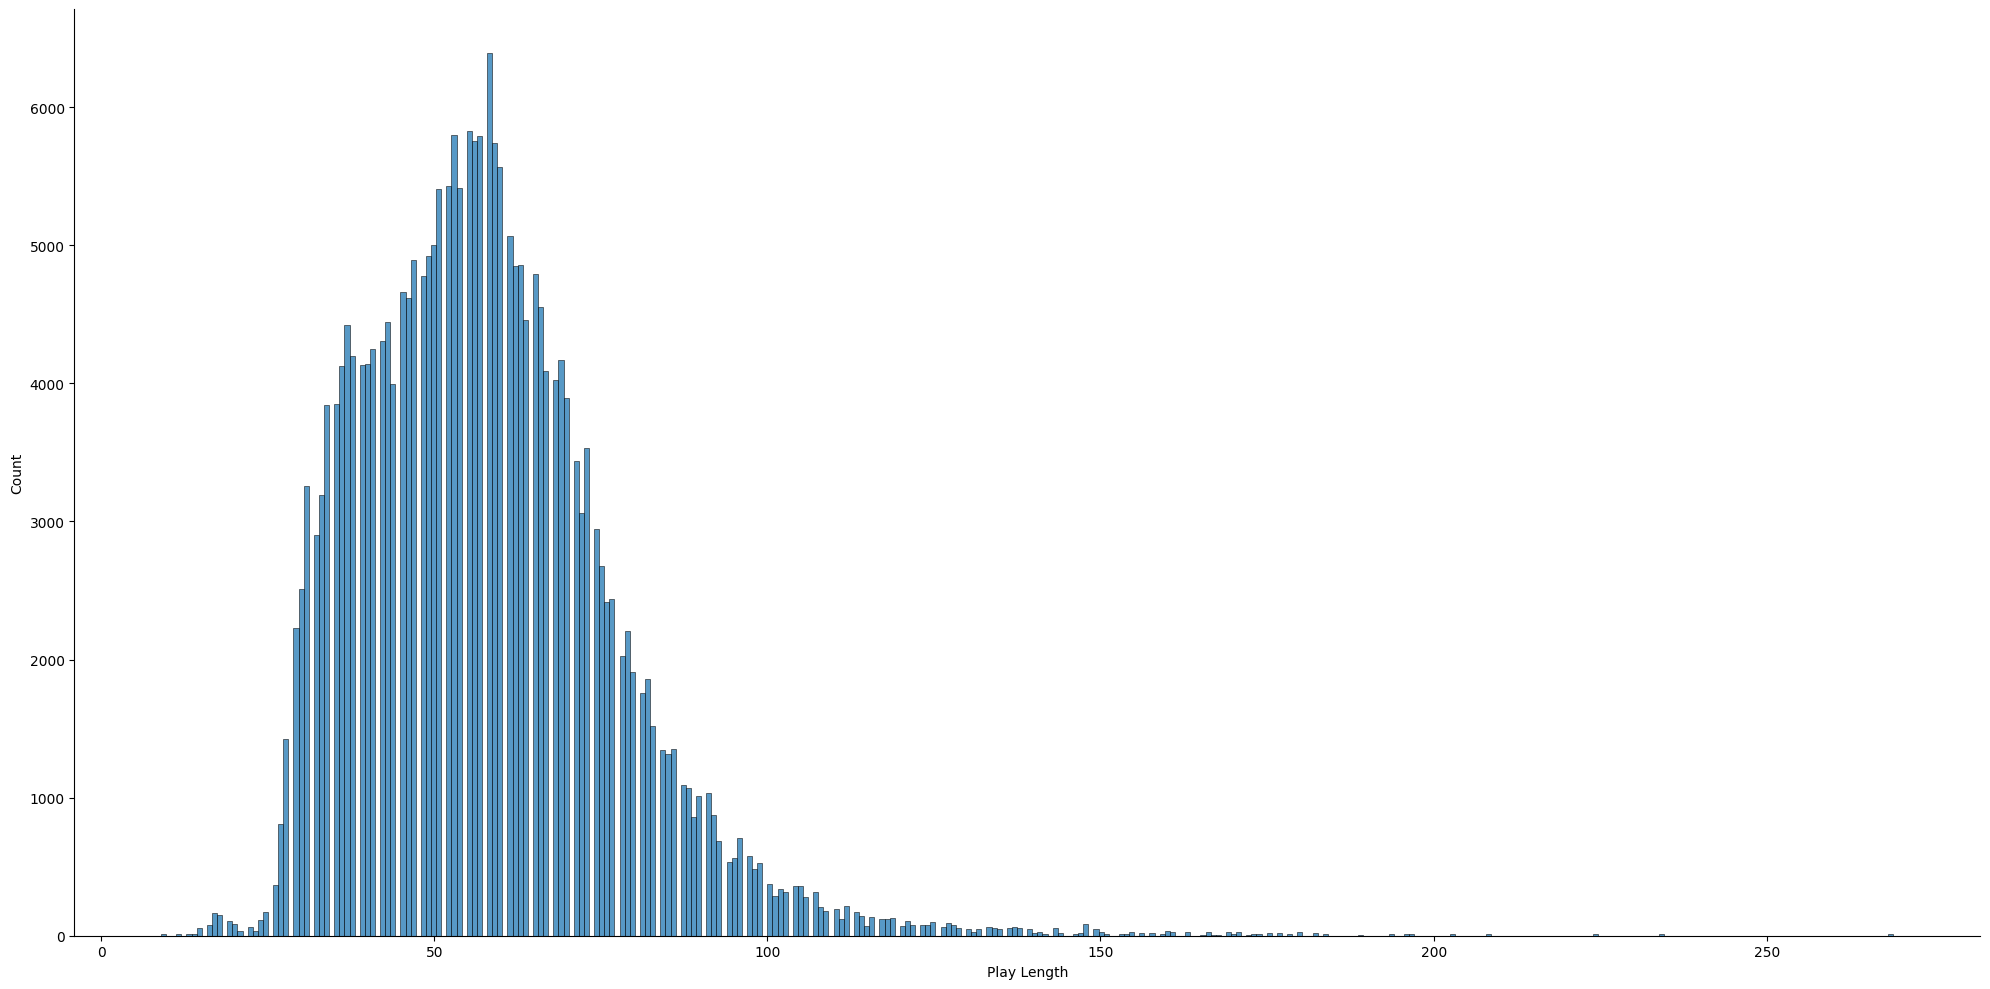

In [39]:
player_tracking_isolated_sum = player_tracking_isolated.groupby(["gameId","playId","nflId"]).size().reset_index(name="counts")
display(player_tracking_isolated_sum)

seq_play_list = player_tracking_isolated_sum["counts"].array

seq_play_df = pd.DataFrame(seq_play_list,columns=["Play Length"])
sb.displot(seq_play_df,x="Play Length",height=10,aspect=2)


### Displaying Distribution of Events After Ball Snap

C:\Users\Alejo\AppData\Local\Temp\ipykernel_11676\3429099777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events["event"] = events["event"].apply(lambda x:event_dic_keyarr[event_dic_valuearr.index(x)])


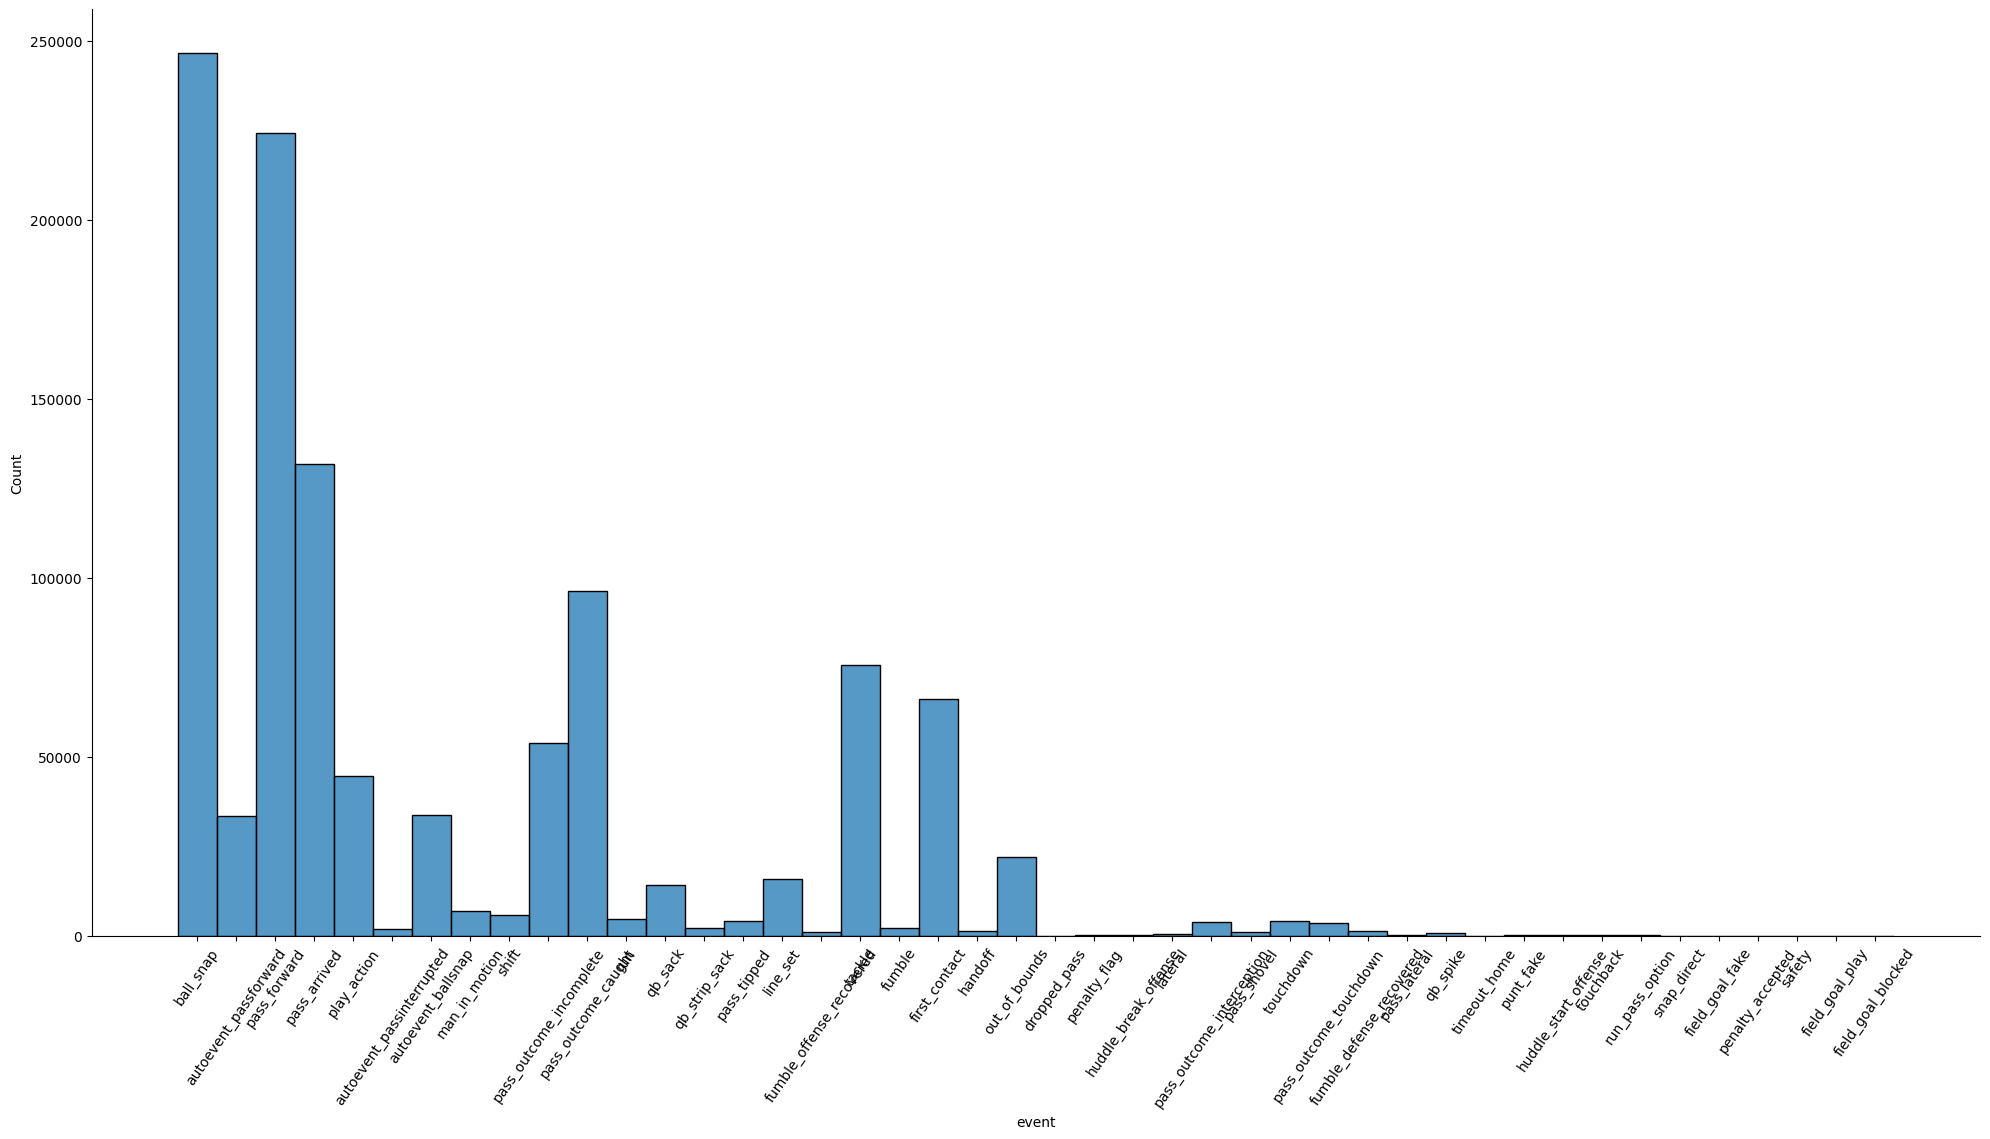

In [40]:
events = player_tracking_isolated.loc[(player_tracking_isolated["event"] != 0)]
events["event"] = events["event"].apply(lambda x:event_dic_keyarr[event_dic_valuearr.index(x)]) 

sb.displot(events,x="event",height=10,aspect=2)
plt.xticks(rotation = 55)
plt.show()

### Getting Player Information To Identify Offensive and Defensive Pairs

In [44]:
player_info = player_tracking_isolated[["nflId","gameId","playId","officialPosition"]]
player_info.drop_duplicates(inplace=True)
display(player_info)

C:\Users\Alejo\AppData\Local\Temp\ipykernel_28052\3124698956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_info.drop_duplicates(inplace=True)


,nflId,gameId,playId,officialPosition
0,35481.0,2021090900,97,4
43,35481.0,2021090900,410,4
70,35481.0,2021090900,434,4
98,35481.0,2021090900,456,4
134,35481.0,2021090900,480,4
...,...,...,...,...
14245037,2561394.0,2018123012,2522,1
14245090,2561394.0,2018123012,2548,1
14245135,2561394.0,2018123012,2739,1
14245194,2561469.0,2018123014,4181,0


### Identifying Pairs Of Offensive and Defensive Players


In [40]:
offensive_positions = [5] #TE,WR = 5
defensive_positions = [1,3,2,0]#SS,FS,CB (DB INCLUDED)

### Create A Function For Checking The Euclidean Distance Between Player Points

In [41]:
def euclidean_distance(first_x,first_y,second_x,second_y):
    return math.sqrt(((first_x-second_x)**2)+((first_y-second_y)**2))

In [42]:
def flipX(x,los_x):
    flipped_x = x - los_x
    flipped_x = -flipped_x
    flipped_x = flipped_x+los_x
    return flipped_x

def flipY(y,los_y):
    flipped_y = y - los_y
    flipped_y = -flipped_y
    flipped_y = flipped_y+los_y
    return flipped_y

### Isolating Player Pairs Into A Dictionary

In [45]:
player_pairs = {}
player_pair_sequences = []
player_pair_sequences_sorted = []
o_player_sequences = []
d_player_sequences = []
o_player_sequences_id = []
player_pair_ids = {}

los_y = 26.65
left_sideline = 53.3
right_sideline = 0.0
los_x = -1
for first_key in seq_dict:
    valid_inner_id = player_info.loc[(player_info["gameId"]==first_key[0])&(player_info["playId"]==first_key[1])]
    offensive_players = valid_inner_id.loc[(valid_inner_id["officialPosition"].isin(offensive_positions))]
    defensive_players = valid_inner_id.loc[(valid_inner_id["officialPosition"].isin(defensive_positions))]
    current_play = player_tracking_isolated.loc[(player_tracking_isolated["gameId"]==first_key[0])&(player_tracking_isolated["playId"]==first_key[1])]
    current_play = current_play.iloc[0]

    play_direction = current_play['playDirection']
    flip_x = play_direction == 0
    #print(play_direction)
    mask = (ball_first_frame['gameId'] == first_key[0])&(ball_first_frame["playId"]==first_key[1])
    ball_row = ball_first_frame[mask]
    if ball_row.empty:
        los_x = -1
    else:
        los_x = ball_row.iloc[0]['x']
    play_dict = seq_dict[first_key]
    play_dict_dense = seq_dict_dense[first_key]
    play_pairs = []
    player_pair_ids[first_key] = []
    for o_player_row in offensive_players.itertuples():
        o_player_key = (o_player_row.officialPosition,o_player_row.nflId)
        if o_player_key in play_dict:
            offensive_player_seq = play_dict[o_player_key]
            min_distance_id = (-1,-1)
            min_distance = -1
            d_player_min_row = -1
            for d_player_row in defensive_players.itertuples():
                d_player_key = (d_player_row.officialPosition,d_player_row.nflId)
                if d_player_key in play_dict:
                    defensive_player_seq = play_dict[d_player_key]
                    o_length = len(offensive_player_seq)
                    d_length = len(defensive_player_seq)
                    min_length = min(o_length,d_length)
                    num_points = min(10,min_length)
                    current_distance = 10000
                    for i in range(num_points):
                        current_index = int(min_length*0.1*i)
                        o_point = offensive_player_seq[current_index]
                        d_point = defensive_player_seq[current_index]
                        distance = math.dist([o_point[2],o_point[3]],[d_point[2],d_point[3]])
                        if distance > current_distance or current_distance == 10000:
                            current_distance = distance
                    last_o_point = offensive_player_seq[-1]
                    last_d_point = defensive_player_seq[-1]
                    distance = math.dist([last_o_point[2],last_o_point[3]],[last_d_point[2],last_d_point[3]])
                    if distance > current_distance:
                        current_distance = distance
                    #mid_point = min(o_length//2,d_length//2)
                    #end_point = min(o_length-1,d_length-1)
                    #o_first_point = offensive_player_seq[1]
                    #d_first_point = defensive_player_seq[1]
                    #o_second_point = offensive_player_seq[mid_point]
                    #d_second_point = defensive_player_seq[mid_point]
                    #o_third_point = offensive_player_seq[end_point]
                    #d_third_point = offensive_player_seq[end_point]

                    #current_distance = math.dist([o_first_point[2],o_first_point[3]],[d_first_point[2],d_first_point[3]]) + math.dist([o_second_point[2],o_second_point[3]],[d_second_point[2],d_second_point[3]])+ math.dist([o_third_point[2],o_third_point[3]],[d_third_point[2],d_third_point[3]]) # 2 = x, 3 = y
                    if current_distance < min_distance or min_distance == -1:
                        min_distance = current_distance
                        min_distance_id = d_player_key
                        d_player_min_row = d_player_row
            if min_distance_id == (-1,-1):
                continue
            play_pairs.append((o_player_key,min_distance_id))
            if los_x != -1:
                o_player_sequence = play_dict_dense[o_player_key]
                o_start_x = o_player_sequence[0][0]
                o_start_y = o_player_sequence[0][1]
                d_player_seq = play_dict_dense[min_distance_id]
                flip_y = o_start_y > los_y
                if flip_x:
                    o_player_sequence = [[flipX(x[0],los_x),x[1],x[2],x[3],x[4],x[5]] for x in o_player_sequence]
                    d_player_seq = [[flipX(x[0],los_x),x[1],x[2],x[3],x[4],x[5]] for x in d_player_seq]
                if flip_y:
                    o_player_sequence = [[x[0],flipY(x[1],los_y),x[2],x[3],x[4],x[5]] for x in o_player_sequence]
                    d_player_seq = [[x[0],flipY(x[1],los_y),x[2],x[3],x[4],x[5]] for x in d_player_seq]
                o_start_x = o_player_sequence[0][0]
                o_start_y = o_player_sequence[0][1]
                d_start_x = d_player_seq[0][0]-o_start_x
                d_start_y = d_player_seq[0][1]-o_start_y
                d_left_sideline_distance = abs(left_sideline - d_start_y)
                d_right_sideline_distance = abs(right_sideline-d_start_y)

                o_left_sideline_distance = abs(left_sideline - o_start_y)
                o_right_sideline_distance = abs(right_sideline-o_start_y)
                d_player_seq_modified = [[x[0]-o_start_x,x[1]-o_start_y,x[2],x[3],x[4],x[5]] for x in d_player_seq]
                o_player_seq_modified = [[x[0]-o_start_x,x[1]-o_start_y,x[2],x[3],x[4],x[5], d_start_x, d_start_y,o_start_x,o_start_y,los_x] for x in o_player_sequence]
                # = [[x[0]-o_start_x,x[1]-o_start_y,x[2],x[3],x[4],x[5], d_start_x, d_start_y,d_left_sideline_distance,d_right_sideline_distance,o_left_sideline_distance,o_right_sideline_distance,los_x] for x in o_player_sequence]
                if min_distance < 8:
                    player_pair_ids[first_key].append(len(o_player_sequences))
                    o_player_sequences.append(o_player_seq_modified)
                    d_player_sequences.append(d_player_seq_modified)
                    o_player_sequences_id.append((first_key[0],first_key[1],o_player_key[1],min_distance_id[1]))
                sequence_pair = [o_player_seq_modified,d_player_seq_modified]
                player_pair_sequences.append(sequence_pair)
                if min_distance!= -1:
                    player_pair_sequences_sorted.append((min_distance,sequence_pair))
    player_pairs[first_key] = play_pairs

print(f"Created player pairs for {len(player_pairs)} different plays")
sum = 0
for key in player_pairs:
    sum+= len(player_pairs[key])
print(f"Player Pairs Generated: {sum}")
print(f"Valid player Sequence Pairs: {len(player_pair_sequences)}")
player_pair_sequences_sorted = sorted(player_pair_sequences_sorted,key=lambda x:x[0])
#player_pair_sequences_filtered = list(filter(lambda x:x[0]<15,player_pair_sequences_sorted))
#print(f"Filtered Sequence Pairs: {len(player_pair_sequences_filtered)}")

Created player pairs for 27633 different plays
Player Pairs Generated: 75316
Valid player Sequence Pairs: 75313


In [46]:
print(f"Number of Offensive Sequences: {len(o_player_sequences)}")
print(f"Number of Defensive Sequences: {len(d_player_sequences)}")

Number of Offensive Sequences: 43856
Number of Defensive Sequences: 43856


### Generating Plot For Every Player On a Given Play With No Position Filters

First we will encode data that is not filtered by player positions using one hot encoding. This is a repetition of what we initially did with the position filtered data above.

In [ ]:
tracking_copy = tracking_w1_data.copy()
tracking_copy = tracking_copy.merge(player_positions,how="inner",on="nflId")
categorical_data = ["team","playDirection","event","officialPosition"]
category_codes_all = {}

w1_data_copy = tracking_copy.copy()

for i in tracking_copy:
    if i in categorical_data:
        specific_codes = {}
        tracking_copy[i] = tracking_copy[i].astype("category")
        tracking_copy[i] = tracking_copy[i].cat.codes
        coded = tracking_copy[i].unique()#
        count = 0
        for j in w1_data_copy[i].unique():
           specific_codes[j] = coded[count]
           count += 1
        category_codes_all[i] = specific_codes
for i in category_codes_all:
  print("{} -".format(i))
  for j in category_codes_all[i]:
    print("{}: {}".format(j, category_codes_all[i][j]))

KeyboardInterrupt: 

### Plot Play Function

Here we generate sequences for a single demo play and plot the player sequences generated for that play. Red corresponds to the offensive team while Blue is the defensive team.

In [ ]:

def plot_play(demo_key):
    demo_play_df_all_positions = tracking_copy.loc[(tracking_copy["gameId"]==demo_key[0])&(tracking_copy["playId"] ==demo_key[1])]
    #display(demo_play_df_all_positions)
    play_ids = demo_play_df_all_positions[["nflId","team","officialPosition"]].drop_duplicates()
    play_sequences_dict = generate_sequences_single_play(demo_play_df_all_positions)

    figure = plt.figure(figsize=(20,10))
    print(f"----------------------------- Displaying Player Tracking Sequences From Play With (gameId,playId)): {demo_key} -----------------------------")
    print("\n\n Here, defense is in blue and offense is in red. \n\n")
    team = -1
    defensive_team = play_data.loc[(play_data["gameId"] == demo_key[0])&(play_data["playId"]==demo_key[1])]
    defensive_team = defensive_team.iloc[0]["defensiveTeam"]
    defensive_team = category_codes["team"][defensive_team]
    play_direction = "right" if demo_play_df_all_positions.iloc[0]["playDirection"] == 1 else "left"
    print(f"Play Direction: {play_direction}\n\n")
    #print(defensive_team)
    for id in play_ids.itertuples():
        id_tuple = (id.officialPosition,id.nflId)
        if id_tuple in play_sequences_dict:
            player_x = []
            player_y = []
            player_seq = play_sequences_dict[id_tuple]
            for point in player_seq:
                player_x.append(point[2])
                player_y.append(point[3])
            if len(player_x)>0 and len(player_y)>0:
                if id.team == defensive_team:
                    plt.plot(player_x,player_y,color = "b",zorder = 2)
                    plt.scatter(player_x[2],player_y[3],color="b",zorder =3)
                else:
                    plt.plot(player_x,player_y,color = "r",zorder = 2)
                    plt.scatter(player_x[2],player_y[3],color="r",zorder =3)

    #plt.ylim([0, 53.3])
    #plt.xlim([0, 120])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    plt.show()


### Allowing Users to Select A Demo Play

In [ ]:
player_pair_keys = list(player_pairs.keys())
input_index= int(input(f"Please enter a value between 0 and {len(player_pair_keys)-1} to select a demo play\n"))
demo_key = player_pair_keys[input_index]

plot_play(demo_key)


ValueError: invalid literal for int() with base 10: ''

### Plotting Player Pair Detected
Here we plot the trajectories that were mapped as closest by the above pair detection. Here we can see that a closer line was not detected, which may be a result of the positional filters set on the data for the player pair detection.

Plotting pair at input index 0 for the play with keys: (2021090900, 97) and ((5, 35634.0), (0, 43478.0))
[37.62, 37.64, 37.64, 37.65, 37.69, 37.74, 37.83, 37.94, 38.1, 38.32, 38.55, 38.81, 39.08, 39.38, 39.68, 39.98, 40.28, 40.58, 40.86, 41.13, 41.39, 41.63, 41.83, 42.02, 42.2, 42.4, 42.59, 42.78, 42.89, 43.02, 43.06, 43.1, 42.98, 42.91, 42.82, 42.7, 42.28, 41.96]


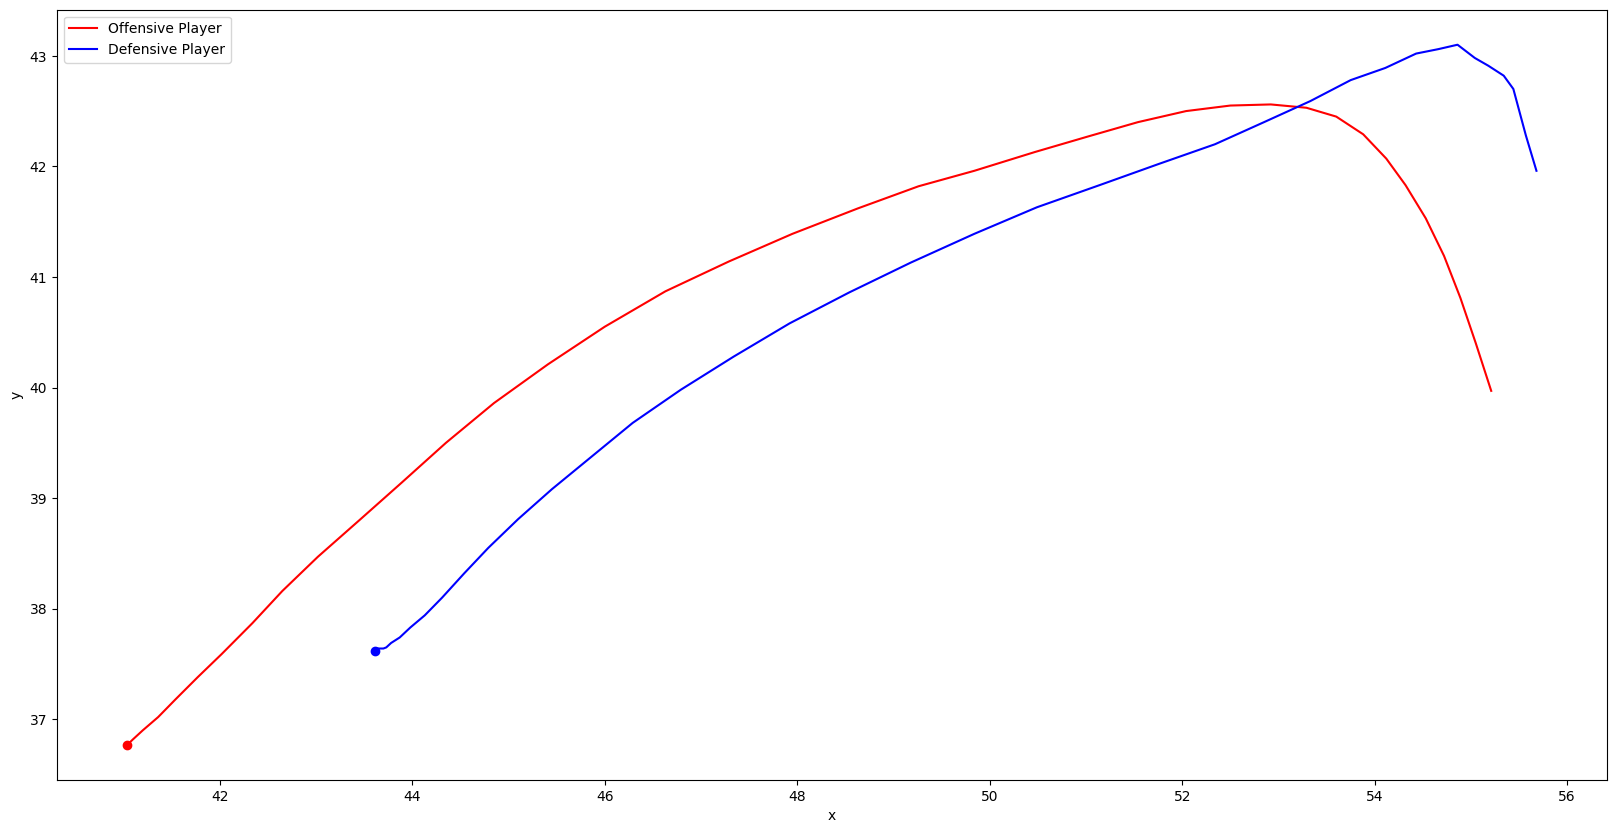

In [ ]:
input_index= int(input(f"Please enter a value between 0 and {len(player_pair_keys)-1} to select a demo play\n"))
demo_key = player_pair_keys[input_index]
input_inner_index = int(input(f"Please enter a value between 0 and {len(player_pairs[demo_key])} to select a player pair to plot in this play\n"))

demo_inner_key = player_pairs[demo_key][input_inner_index]
print(f"Plotting pair at input index {input_inner_index} for the play with keys: {demo_key} and {demo_inner_key}")

o_player_key = demo_inner_key[0]
d_player_key = demo_inner_key[1]
o_player_seq = seq_dict[demo_key][o_player_key]
d_player_seq = seq_dict[demo_key][d_player_key]
#o_player_seq = trajectory_standardization(seq_dict[demo_key][o_player_key])
#d_player_seq = trajectory_standardization(seq_dict[demo_key][d_player_key])

#print(o_player_seq)
o_player_x = []
o_player_y = []
d_player_x = []
d_player_y = []
#temp = []
for point in o_player_seq:
    #temp.append([point[0],point[1]])
    o_player_x.append(point[2])
    o_player_y.append(point[3])
for point in d_player_seq:
    d_player_x.append(point[2])
    d_player_y.append(point[3])
#print(temp)
figure = plt.figure(figsize=(20,10))
plt.scatter(o_player_x[0],o_player_y[0],color="r")
plt.plot(o_player_x,o_player_y,color = "r",label="Offensive Player")
plt.scatter(d_player_x[0],d_player_y[0],color="b")
plt.plot(d_player_x,d_player_y,color = "b",label="Defensive Player")
print(d_player_y)
#plt.ylim([0, 53.3])
#plt.xlim([0, 120])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


### Viewing Pair Sequences Sorted By The Shortest Distance Between Player Pairs

Index: 0


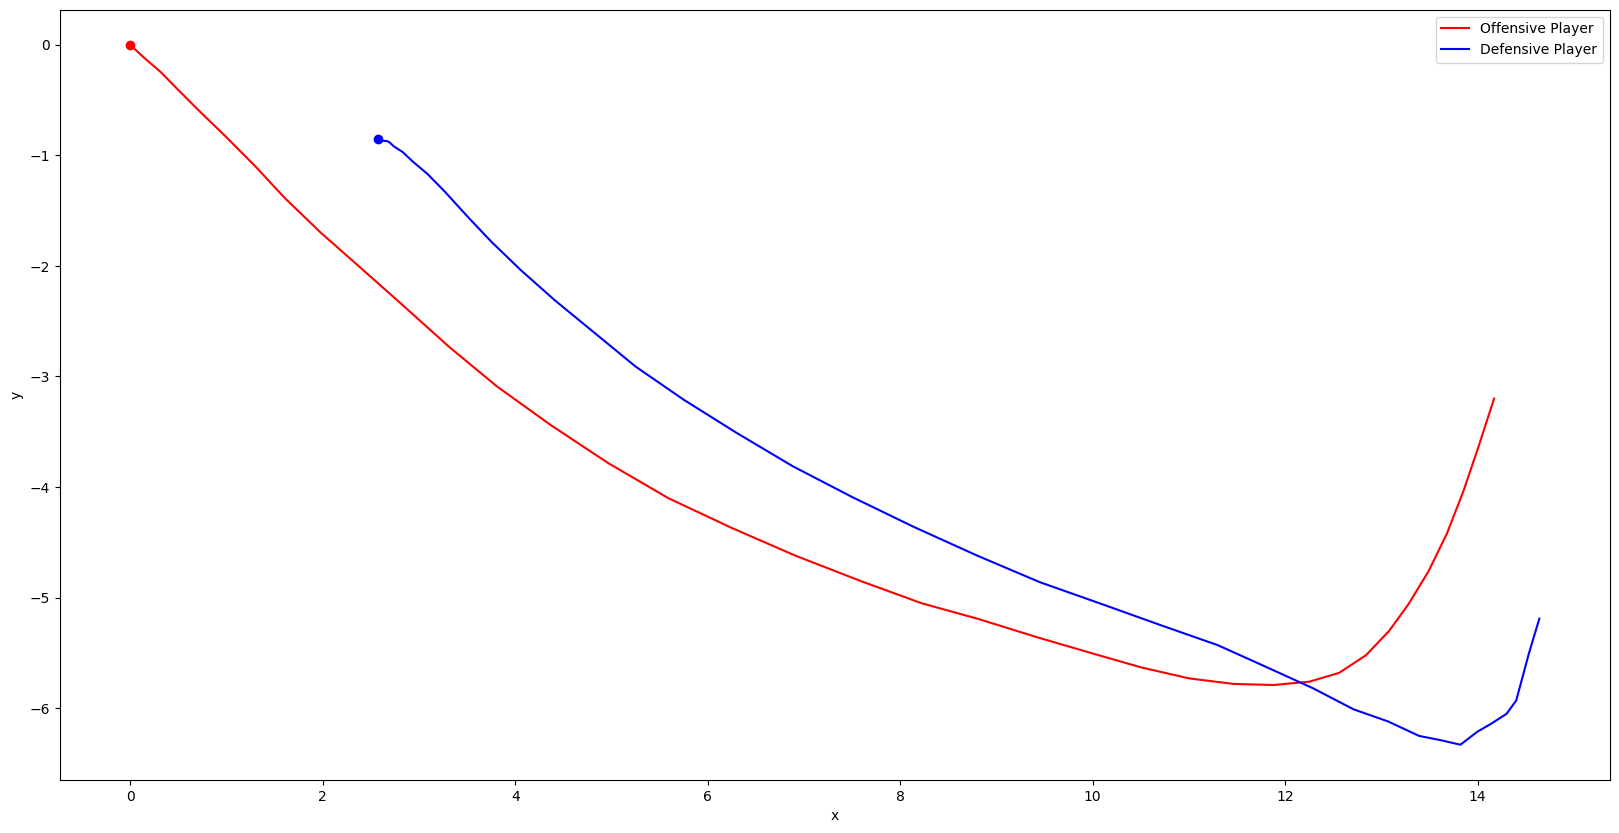

ValueError: invalid literal for int() with base 10: ''

In [ ]:
while True:
    input_index = int(input(f"Please enter a value between 0 and {len(player_pair_sequences_sorted)-1} to select a demo play\n"))
    player_pair_sequence = player_pair_sequences[input_index]
    o_player_seq = player_pair_sequence[0]
    d_player_seq = player_pair_sequence[1]
    #print(f"Metric: {player_pair_sequences[input_index][0]}")
    print(f"Index: {input_index}")
    #print(o_player_seq)
    
    #o_player_seq = trajectory_standardization(seq_dict[demo_key][o_player_key])
    #d_player_seq = trajectory_standardization(seq_dict[demo_key][d_player_key])

    #print(o_player_seq)
    o_player_x = []
    o_player_y = []
    d_player_x = []
    d_player_y = []
    #temp = []
    for point in o_player_seq:
        #temp.append([point[0],point[1]])
        o_player_x.append(point[0])
        o_player_y.append(point[1])
    for point in d_player_seq:
        d_player_x.append(point[0])
        d_player_y.append(point[1])
    #print(temp)
    figure = plt.figure(figsize=(20,10))
    plt.scatter(o_player_x[0],o_player_y[0],color="r")
    plt.plot(o_player_x,o_player_y,color = "r",label="Offensive Player")
    plt.scatter(d_player_x[0],d_player_y[0],color="b")
    plt.plot(d_player_x,d_player_y,color = "b",label="Defensive Player")
    #print(o_player_seq)
    #plt.ylim([-53.3, 53.3])
    #plt.xlim([-120, 120])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()


In [ ]:
'''input_inner_index = int(input(f"Please enter a value between 0 and {len(player_pairs[demo_key])} to select a standardized player pair to plot in this play\n"))
demo_inner_key = player_pairs[demo_key][input_inner_index]
print(f"Plotting pair at input index {input_inner_index} for the play with keys: {demo_key} and {demo_inner_key}")

o_player_key = demo_inner_key[0]
d_player_key = demo_inner_key[1]
o_player_seq = seq_dict_standardized[demo_key][o_player_key]
d_player_seq = seq_dict_standardized[demo_key][d_player_key]

o_player_x = []
o_player_y = []
d_player_x = []
d_player_y = []
for point in o_player_seq:
    o_player_x.append(point[2])
    o_player_y.append(point[3])
for point in d_player_seq:
    d_player_x.append(point[2])
    d_player_y.append(point[3])
    
figure = plt.figure(figsize=(20,10))
plt.scatter(o_player_x[0],o_player_y[0],color="r")
plt.plot(o_player_x,o_player_y,color = "r",label="Offensive Player")
plt.scatter(d_player_x[0],d_player_y[0],color="b")
plt.plot(d_player_x,d_player_y,color = "b",label="Defensive Player")
plt.ylim([-53.3, 53.3])
plt.xlim([-120, 120])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
'''

'input_inner_index = int(input(f"Please enter a value between 0 and {len(player_pairs[demo_key])} to select a standardized player pair to plot in this play\n"))\ndemo_inner_key = player_pairs[demo_key][input_inner_index]\nprint(f"Plotting pair at input index {input_inner_index} for the play with keys: {demo_key} and {demo_inner_key}")\n\no_player_key = demo_inner_key[0]\nd_player_key = demo_inner_key[1]\no_player_seq = seq_dict_standardized[demo_key][o_player_key]\nd_player_seq = seq_dict_standardized[demo_key][d_player_key]\n\no_player_x = []\no_player_y = []\nd_player_x = []\nd_player_y = []\nfor point in o_player_seq:\n    o_player_x.append(point[2])\n    o_player_y.append(point[3])\nfor point in d_player_seq:\n    d_player_x.append(point[2])\n    d_player_y.append(point[3])\n    \nfigure = plt.figure(figsize=(20,10))\nplt.scatter(o_player_x[0],o_player_y[0],color="r")\nplt.plot(o_player_x,o_player_y,color = "r",label="Offensive Player")\nplt.scatter(d_player_x[0],d_player_y[0],colo

### Repeating Player Pair Detection With No Position Filter On the Data'

Here we repeat the same code as above to generate sequences for all the data without any positional filters

In [ ]:
_,_,seq_dict_all_positions,_ = generate_sequences(tracking_copy)
offensive_positions = [11,15,16,12,0,14,6,4] #TE,WR
defensive_positions = [2,8,1,13,10,3,7,9,5]#SS,FS,CB (DB NOT INCLUDED)

#print(seq_dict_all_positions[(2021090900, 97)])
player_info = tracking_copy[["nflId","gameId","playId","officialPosition"]]
player_info.drop_duplicates(inplace=True)
display(player_info)


all_player_pairs = {}
for first_key in seq_dict_all_positions:
    #print(first_key)
    valid_inner_id = player_info.loc[(player_info["gameId"]==first_key[0])&(player_info["playId"]==first_key[1])]
    offensive_players = valid_inner_id.loc[(valid_inner_id["officialPosition"].isin(offensive_positions))]
    defensive_players = valid_inner_id.loc[(valid_inner_id["officialPosition"].isin(defensive_positions))]
    play_dict = seq_dict_all_positions[first_key]
    play_pairs = []
    for o_player_row in offensive_players.itertuples():
        o_player_key = (o_player_row.officialPosition,o_player_row.nflId)
        if o_player_key in play_dict:
            offensive_player_seq = play_dict[o_player_key]
            min_distance_id = (-1,-1)
            min_distance = -1
            #print(f"Offensive player: {o_player_key}")
            for d_player_row in defensive_players.itertuples():
                d_player_key = (d_player_row.officialPosition,d_player_row.nflId)
                if d_player_key in play_dict:
                    defensive_player_seq = play_dict[d_player_key]
                    o_length = len(offensive_player_seq)
                    d_length = len(defensive_player_seq)
                    mid_point = min(o_length//2,d_length//2)
                    end_point = min(o_length-1,d_length-1)
                    o_first_point = offensive_player_seq[1]
                    d_first_point = defensive_player_seq[1]
                    o_second_point = offensive_player_seq[mid_point]
                    d_second_point = defensive_player_seq[mid_point]
                    o_third_point = offensive_player_seq[end_point]
                    d_third_point = offensive_player_seq[end_point]
                    current_distance = math.dist([o_first_point[0],o_first_point[1]],[d_first_point[0],d_first_point[1]]) + math.dist([o_second_point[0],o_second_point[1]],[d_second_point[0],d_second_point[1]])+ math.dist([o_third_point[0],o_third_point[1]],[d_third_point[0],d_third_point[1]]) # 2 = x, 3 = y
                    
                    #print(f"Current min: {min_distance}")
                    #print(f"Defensive player: {d_player_key} with distance: {current_distance}")
                    
                    if current_distance < min_distance or min_distance == -1:
                        min_distance = current_distance
                        min_distance_id = d_player_key
            play_pairs.append((o_player_key,min_distance_id))
    all_player_pairs[first_key] = play_pairs 
    #break

print(f"Created player pairs for {len(all_player_pairs)} different plays")
sum = 0
for key in all_player_pairs:
    sum+= len(all_player_pairs[key])
print(f"Player Pairs Generated: {sum}")

Sequences generated: 187483


C:\Users\Alejo\AppData\Local\Temp\ipykernel_3520\3847876655.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_info.drop_duplicates(inplace=True)


,nflId,gameId,playId,officialPosition
0,25511.0,2021090900,97,13
43,25511.0,2021090900,410,13
70,25511.0,2021090900,434,13
98,25511.0,2021090900,456,13
134,25511.0,2021090900,480,13
...,...,...,...,...
7952438,46772.0,2021110100,1351,12
7952487,46772.0,2021110100,1396,12
7952539,46772.0,2021110100,1458,12
7952574,46772.0,2021110100,3392,12


Created player pairs for 8522 different plays
Player Pairs Generated: 79625


### Plotting The New Player Pairs

Here we repeat the plot seen above with the player pairs without positional filters.

Outer Key: (2021090900, 97)
Inner Key: ((0, 40151.0), (13, 25511.0))


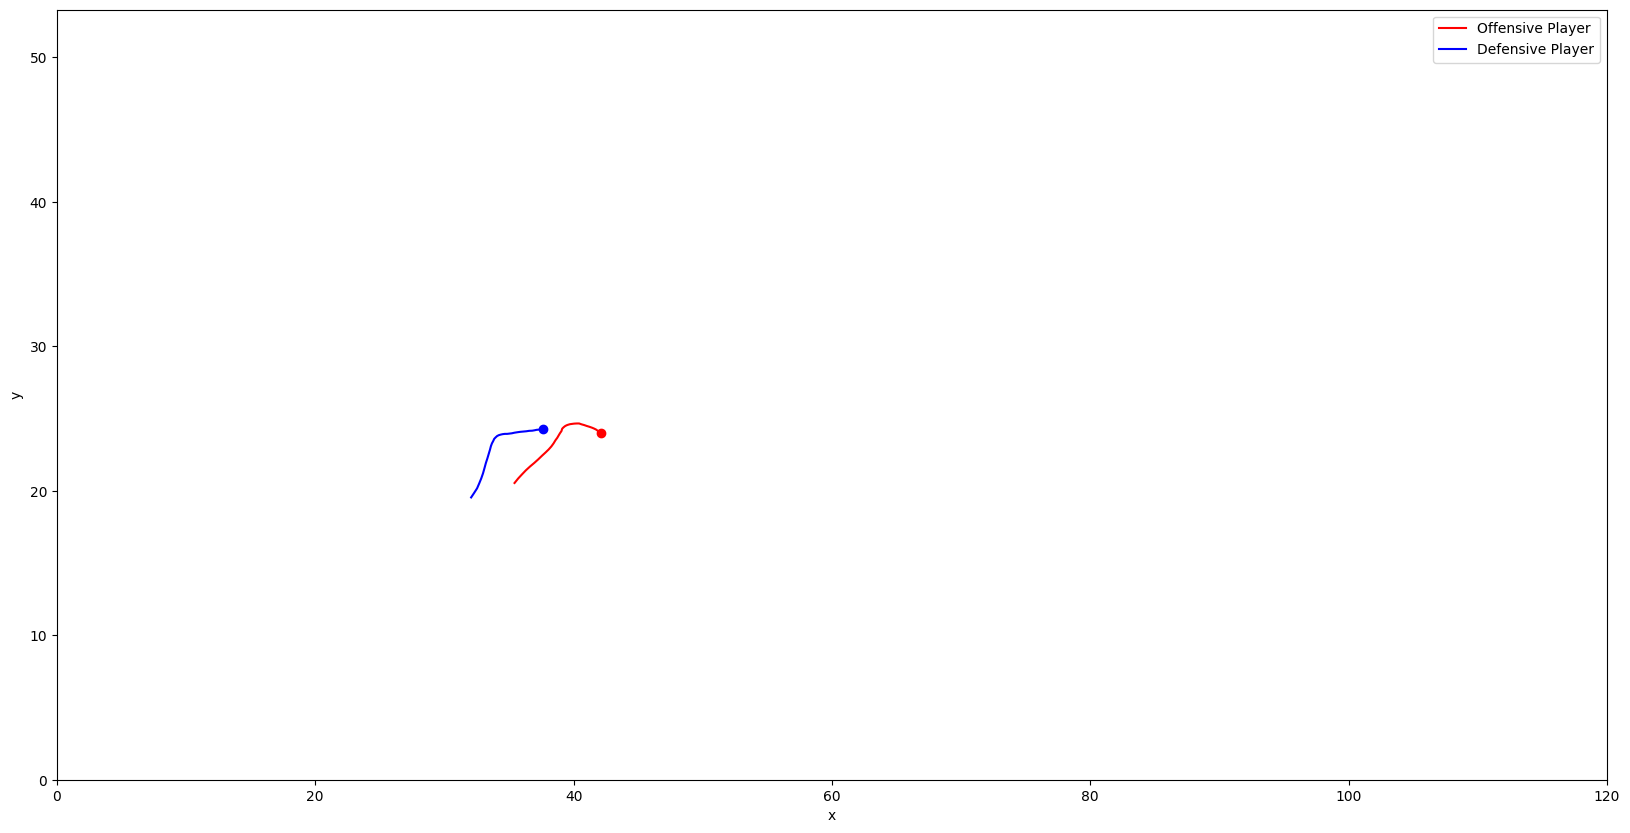

In [ ]:
demo_inner_key = -1
for key in all_player_pairs:
    demo_key = key
    demo_inner_key = all_player_pairs[key][1]
    print(f"Outer Key: {key}")
    print(f"Inner Key: {demo_inner_key}")
    break
o_player_key = demo_inner_key[0]
d_player_key = demo_inner_key[1]
o_player_seq = seq_dict_all_positions[demo_key][o_player_key]
d_player_seq = seq_dict_all_positions[demo_key][d_player_key]


o_player_x = []
o_player_y = []
d_player_x = []
d_player_y = []

for point in o_player_seq:
    o_player_x.append(point[2])
    o_player_y.append(point[3])
for point in d_player_seq:
    d_player_x.append(point[2])
    d_player_y.append(point[3])

figure = plt.figure(figsize=(20,10))
plt.scatter(o_player_x[0],o_player_y[0],color="r")
plt.plot(o_player_x,o_player_y,color = "r",label="Offensive Player")
plt.scatter(d_player_x[0],d_player_y[0],color="b")
plt.plot(d_player_x,d_player_y,color = "b",label="Defensive Player")
plt.ylim([0, 53.3])
plt.xlim([0, 120])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


### Save Sequence Arrays As Binary Files

In [47]:
import numpy as np

np.save("trajectories.npy", [o_player_sequences, d_player_sequences])
np.save("o_player_sequences_id.npy", o_player_sequences_id)

#array1, array2 = np.load("trajectories.npy")

C:\Users\Alejo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [ ]:
%pip install json

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\Alejo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [48]:
import json

player_pairs_upload = {str(key): value for key, value in player_pairs.items()}

with open('player_pairs.json', 'w') as f:
    json.dump(player_pairs_upload, f)


player_pair_ids_upload = {str(key): value for key, value in player_pair_ids.items()}

with open('player_pair_ids.json', 'w') as f:
    json.dump(player_pair_ids_upload, f)

In [49]:
game_data.to_csv("all_games.csv",index=False)
play_data.to_csv("all_plays.csv",index=False)
player_data.to_csv("all_players.csv",index=False)

- Flip order of pair detection/orientation (COMPLETE)
- Example sequences to test LSTM framework (with/without padding as well) (COMPLETE)
- Change metric for pair detection and rank the pairs by the metric in a table, select the top 100 and graph, and use these to train the model if they are feasible (This will ensure the quality of pairing) (IN PROGRESS)
- Use plotly or a plotting library for first attempt at plotting